In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [55]:
X_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [56]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [57]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


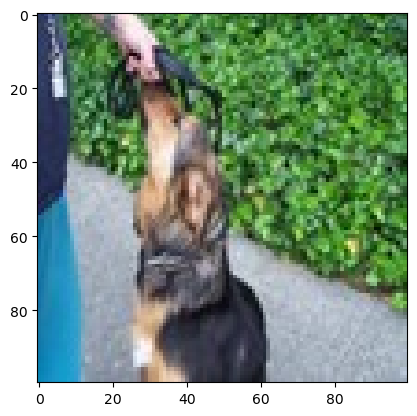

In [58]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])

### Model 

In [59]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.5021 - loss: 0.7588
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5756 - loss: 0.6761
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6658 - loss: 0.6161
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.7393 - loss: 0.5338
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.8024 - loss: 0.4534


In [62]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7285 - loss: 0.5578


[0.591128945350647, 0.7049999833106995]

### making predictions

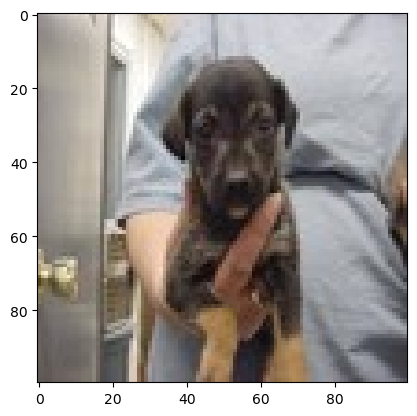

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
our model says it is a dog


In [63]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

print('our model says it is a', pred)